# Learning credit networks with applications in financial industry

In [4]:
from igraph import *
import numpy as np

In [85]:
dic_GAZPRU = {'GAZPRU':1,'LUKOIL': 0.5054791, 'RUSAGB': 0.4169298, 'RUSSIA': 0.4133096, 'AKT': 0.3142437, 'RUSRAI': 0.2894857, 'VTB': 0.2771891, 'MBT': 0.2251381, 'SBERBANK': 0.2132872, 'ROSNEF': 0.1794645, 'GAZPRU.Gneft': 0.1718102, 'ALROSA': 0.1214424, 'BKECON': 0.1182884, 'VIP': 0.1130922, 'MDMOJC': 0.1125437, 'BOM': 0.09752941, 'CITMOS': 0.09603731, 'EVRGSA': 0.07702289 }
edge_list = [['AKT','BKECON'],['AKT','ROSNEF'],['AKT','RUSSIA'],['ALROSA','GAZPRU.Gneft'],['ALROSA','MBT'],
             ['ALROSA','SBERBANK'],['BKECON','MBT'],['CITMOS','BOM'],['CITMOS','BKECON'],['GAZPRU','LUKOIL'],
             ['GAZPRU','MBT'],['GAZPRU','RUSAGB'],['GAZPRU','VTB'],['GAZPRU.Gneft','VTB'],['VTB','MDMOJC'],
             ['RUSAGB','RUSRAI'],['RUSAGB','VTB'],['RUSRAI','CITMOS'],['RUSRAI','LUKOIL'],['RUSSIA','GAZPRU'],
             ['RUSSIA','SBERBANK'],['ROSNEF','EVRGSA',],['GAZPRU.Gneft','VIP']]

In [86]:
def initilise_edges(nodes,edge_list):
    edge_index_list = []
    for e in edge_list:
        first_index = nodes.index(e[0])
        second_index = nodes.index(e[1])
        edge_index_list.append((first_index,second_index))
    return(edge_index_list)

In [87]:
def generate_network(cp_dic,edge_list):
    nodes = list(sorted(dic_GAZPRU.keys()))
    edge_index_list = initilise_edges(nodes,edge_list)
    color_list = []
    for n in nodes:
        shade = str((1-cp_dic[n])*100) 
        color_list.append("rgb(100%," +shade+"%,"+ shade + "%)")
    return(edge_index_list, color_list)    

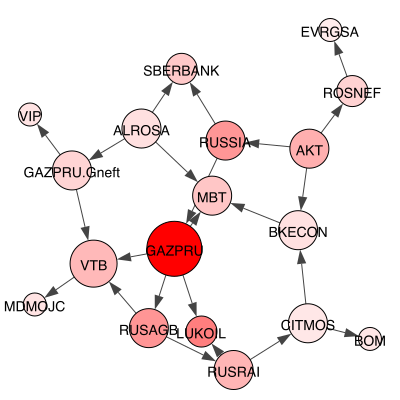

In [106]:
edge_index,color_list = generate_network(dic_GAZPRU,edge_list)
g = Graph(edge_index,directed=True)
size = [15+g*8 for g in g.degree()]
g.vs["cpty"] = list(sorted(dic_GAZPRU.keys()))
g.vs["label"] = g.vs["cpty"]
plot(g, layout = g.layout("fr"), bbox = (400, 400), margin = 30, vertex_size=size,vertex_color=color_list)

In [97]:
node_list = ["AKT","ALROSA","BKECON","BOM","CITMOS","EVRGSA","GAZPRU","GAZPRU.Gneft","LUKOIL","MBT","MDMOJC","ROSNEF","RSBZAO","RUSAGB","RUSRAI","RUSSIA","SBERBANK","VIP","VTB"]
cpd = [0.384708888146627,0.136312023766175,0.357275754342278,0.156587264935736,0.359589689277553,0.0810876865930028,1,0.634061593799393,0.147187710400797,0.0766722211500934,0.17770578552972,0.273513919911646,0.140377208880834,0.346557936697911,0.583522285146415,0.545094164616304,0.386672164934854,0.0802410978584497,0.154361655175781]
dic_crisis =  dict.fromkeys(node_list)
for n,c in zip(node_list,cpd):
    dic_crisis[n]=c
print(dic_crisis)
edge_crisis = [["AKT","MDMOJC"],["ALROSA","AKT"],["ALROSA","BOM"],["ALROSA","LUKOIL"],["ALROSA","MBT"],["BKECON","ROSNEF"],["BOM","VTB"],["RUSAGB","EVRGSA"],["GAZPRU","AKT"],["GAZPRU","GAZPRU.Gneft"],["GAZPRU","RUSAGB"],["GAZPRU","RUSRAI"],["GAZPRU","RUSSIA"],["GAZPRU","SBERBANK"],["GAZPRU.Gneft","BKECON"],["GAZPRU.Gneft","CITMOS"],["GAZPRU.Gneft","RUSRAI"],["GAZPRU.Gneft","RUSSIA"],["GAZPRU.Gneft","SBERBANK"],["LUKOIL","ROSNEF"],["ROSNEF","VIP"],["ROSNEF","VTB"],["RUSRAI","ROSNEF"],["RUSSIA","RUSAGB"],["SBERBANK","CITMOS"],["SBERBANK","RUSAGB"]]


{'GAZPRU.Gneft': 0.634061593799393, 'CITMOS': 0.359589689277553, 'RUSRAI': 0.583522285146415, 'RUSSIA': 0.545094164616304, 'VTB': 0.154361655175781, 'GAZPRU': 1, 'EVRGSA': 0.0810876865930028, 'MDMOJC': 0.17770578552972, 'RUSAGB': 0.346557936697911, 'SBERBANK': 0.386672164934854, 'AKT': 0.384708888146627, 'ROSNEF': 0.273513919911646, 'ALROSA': 0.136312023766175, 'BOM': 0.156587264935736, 'VIP': 0.0802410978584497, 'BKECON': 0.357275754342278, 'LUKOIL': 0.147187710400797, 'MBT': 0.0766722211500934, 'RSBZAO': 0.140377208880834}


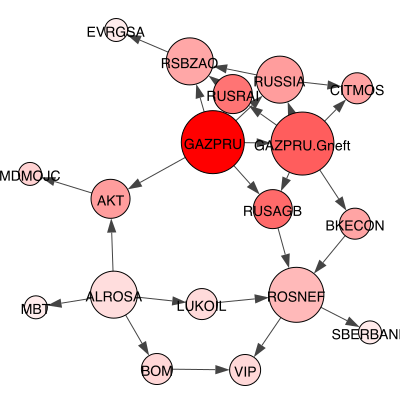

In [105]:
edge_index_crisis,color_list_crisis = generate_network(dic_crisis,edge_crisis)
g_crisis = Graph(edge_index_crisis,directed=True)
size_crisis= [15+g*8 for g in g_crisis.degree()]
g_crisis.vs["cpty"] = list(sorted(dic_crisis.keys()))
g_crisis.vs["label"] = g_crisis.vs["cpty"]
plot(g_crisis, layout = g_crisis.layout("fr"), bbox = (400, 400), margin = 30, vertex_size=size_crisis,vertex_color=color_list_crisis)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel('entities_data_fixed.xlsx')
df.head()

,Ticker,ShortName,Sector,Region,Country,14-SEP-10,15-SEP-10,16-SEP-10,17-SEP-10,20-SEP-10,...,03-AUG-15,04-AUG-15,05-AUG-15,06-AUG-15,07-AUG-15,10-AUG-15,11-AUG-15,12-AUG-15,13-AUG-15,14-AUG-15
0,AKT,Transneft,Government,E.Eur,Russian Federation,189.589227,189.588183,181.548898,190.435708,169.581443,...,336.149939,356.158330,351.213794,346.109314,360.430981,362.389470,353.620012,355.041107,358.285913,362.465974
1,ALROSA,Alrosa Co Ltd,Basic Materials,E.Eur,Russian Federation,407.891724,375.448000,386.652398,387.688233,344.708972,...,453.164084,460.740395,458.321554,455.478644,463.144691,460.092697,456.280640,461.897270,463.529927,465.626825
2,BKECON,Vnesheconombank,Financials,E.Eur,Russian Federation,182.538198,182.941736,169.814252,185.219746,177.801662,...,418.678440,413.351122,418.428390,418.108905,423.944798,433.101248,449.877204,422.916233,459.097561,433.232868
3,BOM,Bk of Moscow,Government,E.Eur,Russian Federation,308.822927,335.059883,312.007433,332.608696,340.899281,...,421.480408,421.460252,416.083307,412.915443,430.287724,435.300508,427.411261,432.393100,434.306341,421.756966
4,CITMOS,City Moscow,Government,E.Eur,Russian Federation,164.009125,162.805576,162.539306,163.907477,163.555567,...,308.840795,322.417322,319.642084,313.364539,329.073539,327.665794,318.479091,327.989025,332.942778,335.941244


In [2]:
date_list = df.columns[5:]
df_matrix=df.as_matrix(date_list)
label_list = list(df['ShortName'])
[row,column]=df_matrix.shape

In [6]:
import plotly.plotly as py
import plotly.graph_objs as go

data=[]
for i in range(row):
    trace = go.Scatter(
    x = date_list,
    y = np.asarray(df_matrix[i][:]),
    mode = 'lines',
    name = label_list[i]
    )
    data.append(trace)
# Edit the layout
layout = dict(title = 'Time series spreads for Russian CDS',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'CDS spreads in bps'),
              )

fig = dict(data=data, layout=layout)
plt_url = py.plot(fig, filename='styled-line')

In [13]:
df_fx = pd.read_excel('entities_data_fixed.xlsx',sheetname=1)

In [22]:
df_fx.head()
fx = list(df_fx['FX_new'])
fx = np.asarray([1/ f for f in fx])
fx_new = fx[::-1]

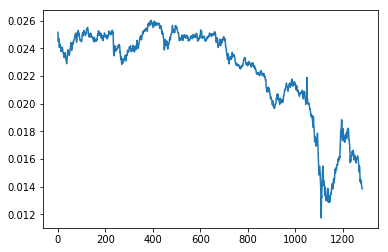

In [25]:
plt.plot(fx_new)
plt.show()

In [29]:
import plotly.plotly as py
import plotly.graph_objs as go

data=[]
trace1 = go.Scatter(
    x = date_list,
    y = np.asarray(df_matrix[6][:]),
    mode = 'lines',
    name = 'Gazprom CDS'
    )
trace2 = go.Scatter(
    x = date_list,
    y = fx_new,
    mode = 'lines',
    name = 'RUB/EUR FX'
    )


data = [trace1, trace2]
layout = go.Layout(
    title='Gaprom CDS vs. RUB/EUR FX rate',
    yaxis=dict(
        title='CDS spread (in bps)'
    ),
    yaxis2=dict(
        title='RUB/EUR FX rate',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='cds vs fx')

In [72]:
otc_market = pd.read_excel('derivative_market.xlsx')

In [73]:
otc_market.head()

,Derivatives risk category,1998-06-30 00:00:00,1998-12-31 00:00:00,1999-06-30 00:00:00,1999-12-31 00:00:00,2000-06-30 00:00:00,2000-12-31 00:00:00,2001-06-30 00:00:00,2001-12-31 00:00:00,2002-06-30 00:00:00,...,2013-06-30 00:00:00,2013-12-31 00:00:00,2014-06-30 00:00:00,2014-12-31 00:00:00,2015-06-30 00:00:00,2015-12-31 00:00:00,2016-06-30 00:00:00,2016-12-31 00:00:00,2017-06-30 00:00:00,2017-12-31 00:00:00
0,Credit Derivatives,3305689,4140849,3367025,3604759,3296358,4079034,20540693,25551448,30016011,...,732574430,660498131,641444801,600862945,458781012,426545703,350048335,300838280,306843245,312488898
1,Equity,200344998,248272918,254647198,370265765,302913520,301739257,218082049,228399012,270196594,...,706333627,713020022,690520445,626914559,616573332,505454208,522570958,477252258,523889689,574897170
2,Commodities,83885210,95589839,96824344,127686061,167889839,277057006,175527290,162994944,171938822,...,782498718,540889216,550924278,649791050,485214669,604707816,491990263,408467640,342404585,462038369
3,Foreign exchange,979060336,1011524926,765118991,858450373,757017581,1071266216,966966303,1020330364,1335402957,...,2612552584,2456618222,1883695741,3127506964,2680628878,2712338418,3577897696,3323592701,2626202747,2292811438
4,Interest rate,1337110113,1897251514,1537756716,1497375236,1407364908,1645467192,1747941327,2427423082,2722650432,...,15763543536,14688981017,13913539995,16127805358,11464753519,10524967037,16416608556,10635747752,9045326483,7578529519


In [74]:
half_years = otc_market.columns[1:]
label = list(otc_market['Derivatives risk category'])
market_val = np.transpose(otc_market.as_matrix(half_years))/1000000

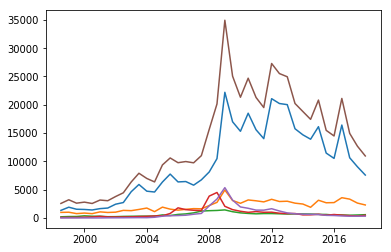

In [69]:
plt.plot(half_years,market_val)
plt.show()

In [70]:
data=[]
[row,col] = np.shape(market_val)

for i in range(col):
    trace = go.Scatter(
    x = half_years,
    y = np.transpose(market_val)[i][:],
    mode = 'lines',
    name = label[i]
    )
    data.append(trace)
# Edit the layout
layout = dict(title = 'Gross market value of OTC derivative contracts',
              yaxis = dict(title = 'Gross maket value (in billions of USD)'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

In [79]:
data=[]
[row,col] = np.shape(market_val)

for i in range(col-1):
    trace = go.Bar(
    x = half_years,
    y = np.transpose(market_val)[i][:],
    name = label[i],
    opacity = 0.8
    )
    data.append(trace)
# Edit the layout
layout = dict(title = 'Gross market value of OTC derivative contracts',
              yaxis = dict(title = 'Gross maket value (in billions of USD)'),
                barmode='stack'
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')